In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mobileData = pd.read_csv("./train - train.csv")
mobileData.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


# check for null values

In [4]:
mobileData.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
mobileData.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
for feature in mobileData:
    if(len(mobileData[feature].value_counts())<=5):
        print(mobileData[feature].value_counts())

blue
0    1010
1     990
Name: count, dtype: int64
dual_sim
1    1019
0     981
Name: count, dtype: int64
four_g
1.0    1040
0.0     955
Name: count, dtype: int64
three_g
1    1523
0     477
Name: count, dtype: int64
touch_screen
1    1006
0     994
Name: count, dtype: int64
wifi
1    1014
0     986
Name: count, dtype: int64
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

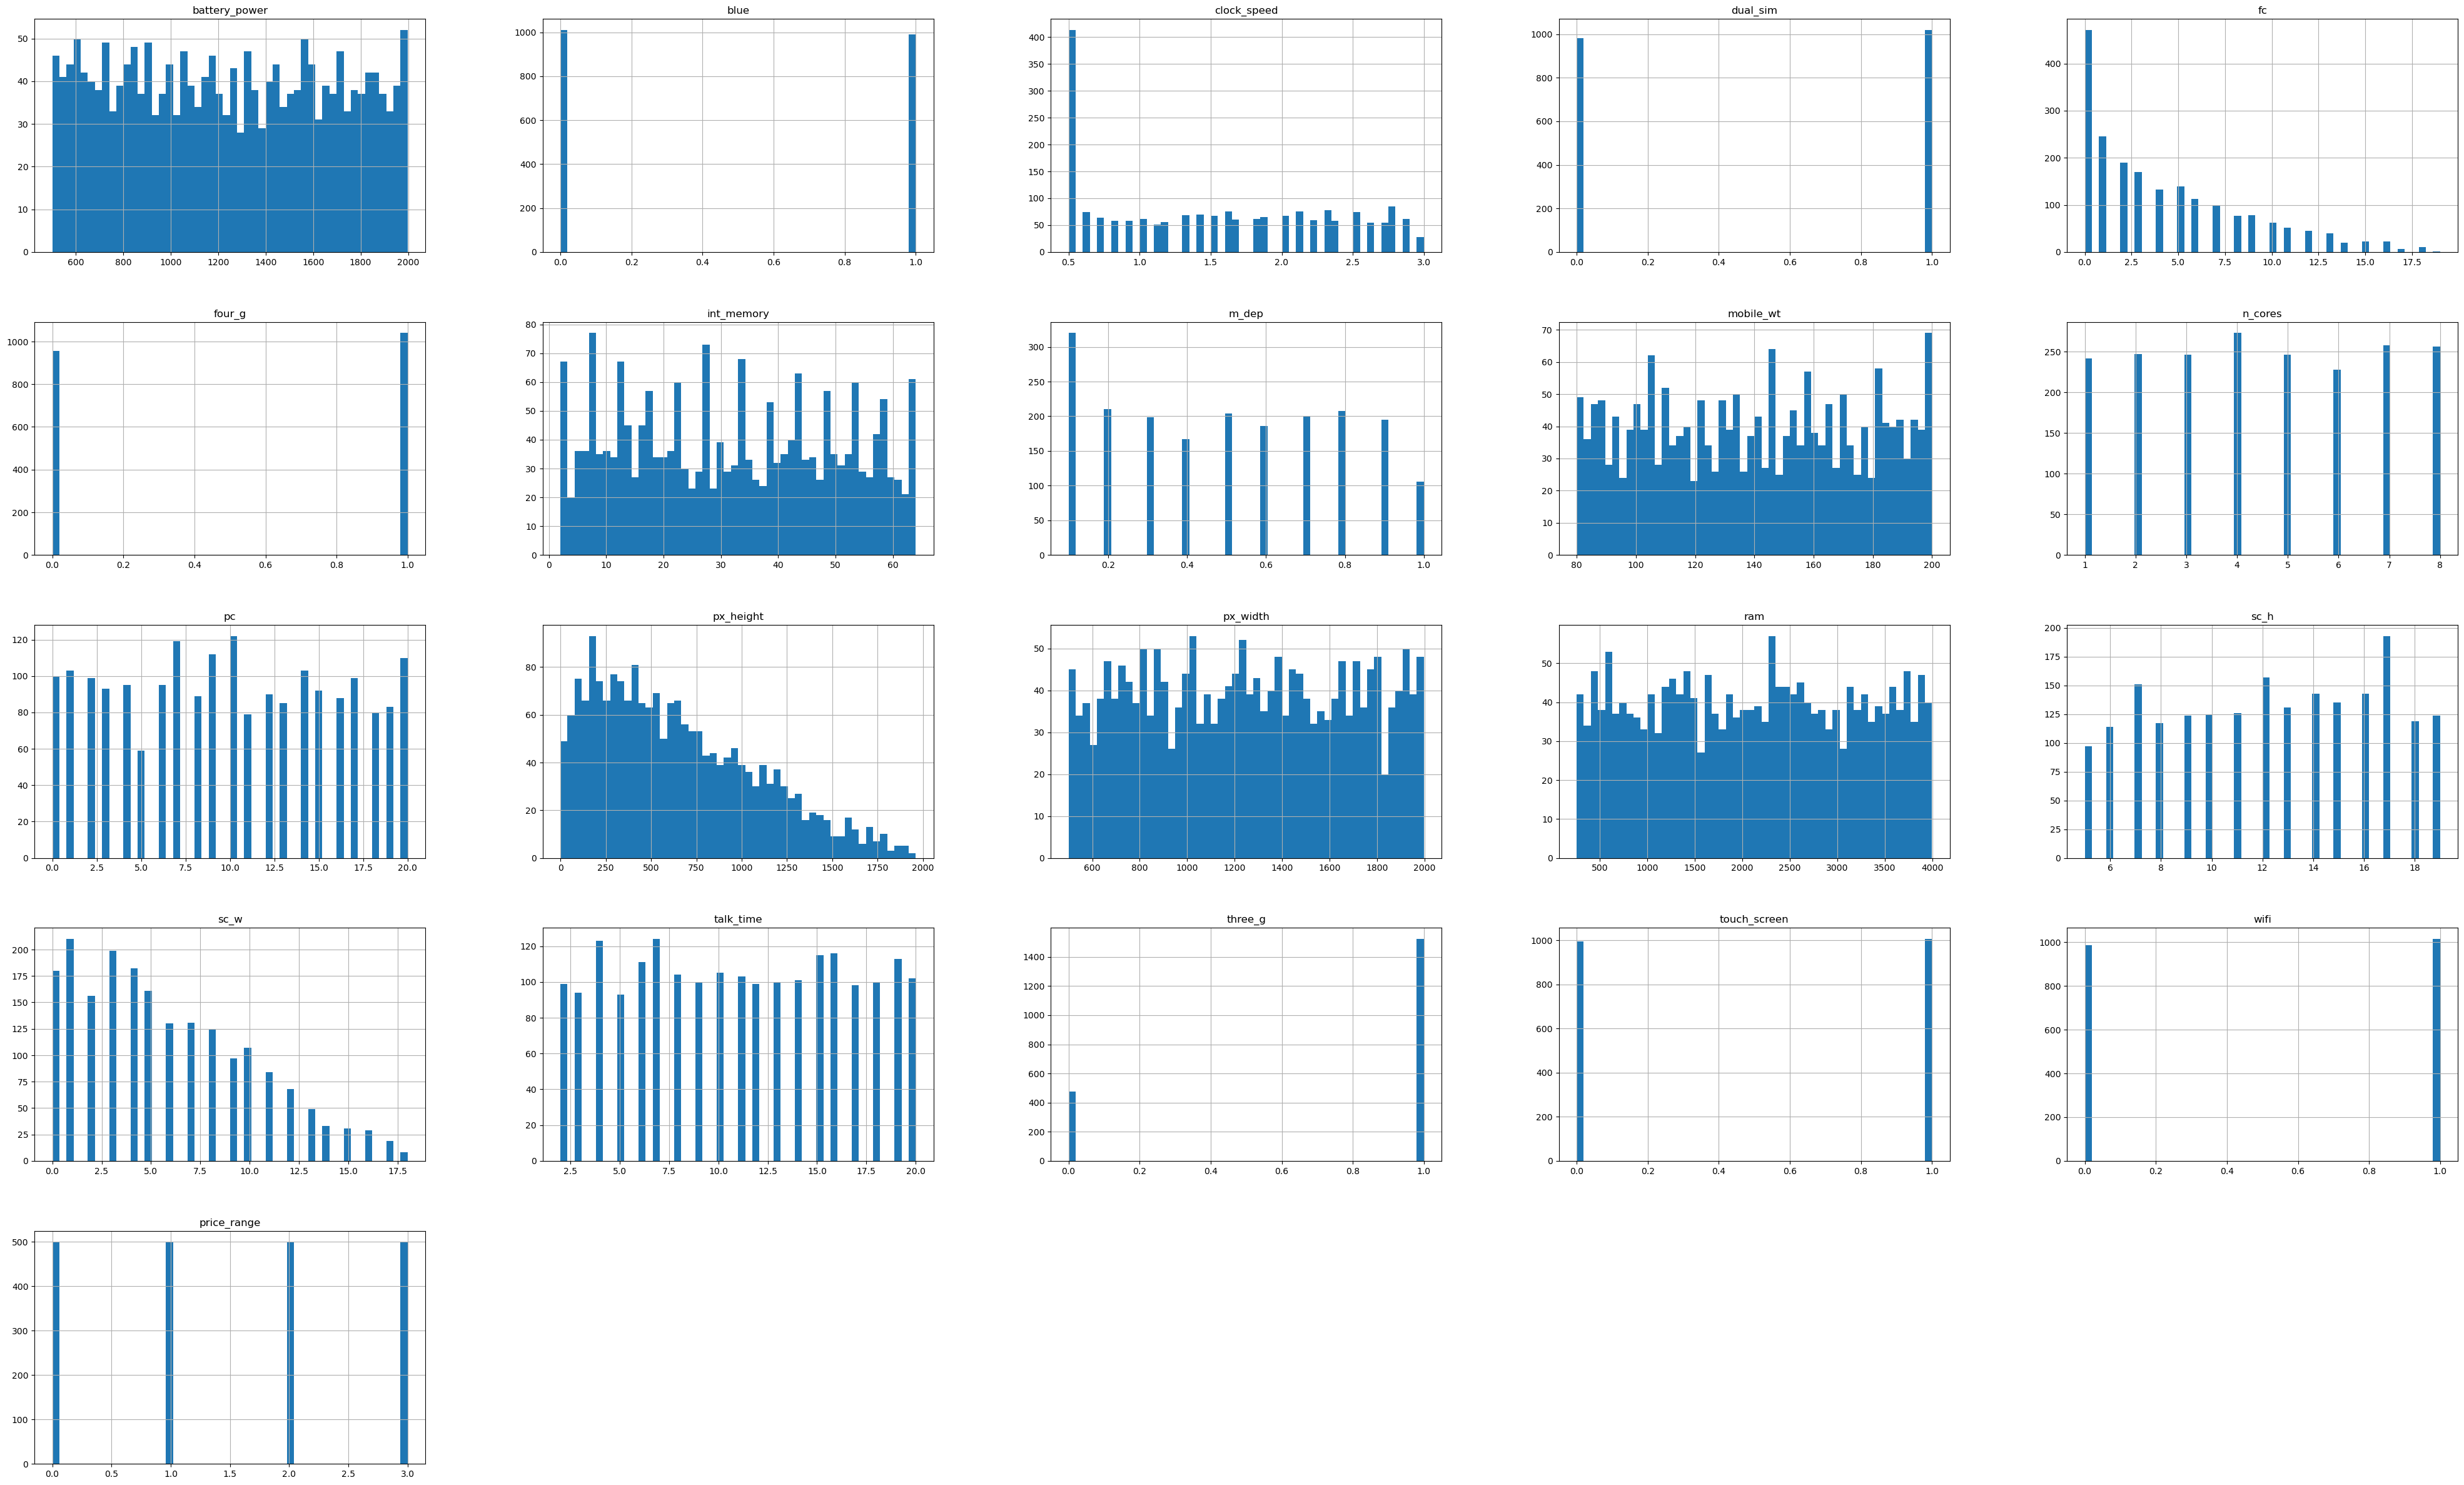

In [15]:
mobileData.hist(bins=50, figsize=(50,30))
#there are outliers in px_height and sr_w

<Axes: >

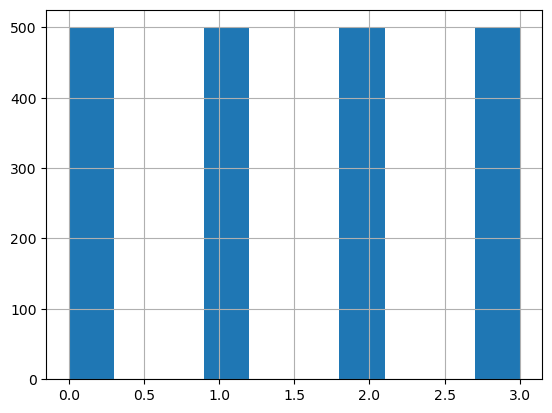

In [24]:
mobileData['price_range'].hist()
#data is balanced

In [28]:
desc = mobileData.describe()

for feature in mobileData:
    if(len(mobileData[feature].unique())>10):
        print(desc[feature]['std'], feature, len(mobileData[feature].unique()))

439.4182060835312 battery_power 1094
0.8160042088950705 clock_speed 26
4.335765938447826 fc 21
18.146475524117875 int_memory 64
0.2885301957049394 m_dep 11
35.3846759265997 mobile_wt 122
6.058468572181424 pc 22
443.35544275819075 px_height 1136
432.3529303075544 px_width 1110
1085.2733718860313 ram 1562
4.212372936551555 sc_h 16
4.357400304384525 sc_w 20
5.463955197766686 talk_time 19


In [31]:
corr = mobileData.corr()
sorted(corr['price_range'], reverse=True)

[1.0,
 0.9171186800614716,
 0.20072261211373124,
 0.1660939630604023,
 0.1481843738530207,
 0.04258896894034792,
 0.038777324258689294,
 0.034638886136243885,
 0.02499932458455271,
 0.023611216880045166,
 0.023300282688466366,
 0.02185887116237482,
 0.020572854061418573,
 0.01878481201278905,
 0.01744447923722472,
 0.015494263246261145,
 0.0045982459682917315,
 -8.295440315020154e-05,
 -0.00660569088173212,
 -0.03041107189821805,
 -0.03245655344390371]

<Axes: >

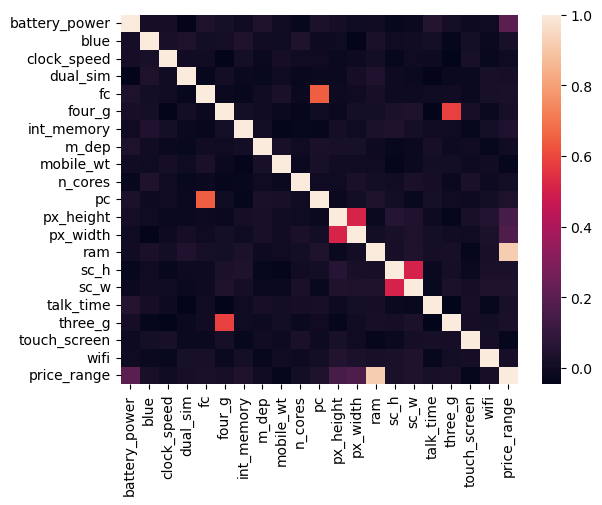

In [35]:
sns.heatmap(corr)

# overall data looks good and has few managable problems